## Step 1: tiny dataset

In [19]:
import numpy as np

In [20]:
# tiny dataset

X = np.array(
    [
        [1, 2],
        [2, 3],
        [3, 1],
        [6, 5],
        [7, 7]
    ]
)

print(X.shape, '\n')
print(f"{X.shape[0]} rows ({X.shape[0]} datapoints)")
print(f"{X.shape[1]} cols ({X.shape[1]} features)")

(5, 2) 

5 rows (5 datapoints)
2 cols (2 features)


In [21]:
# target (Classes)

"""
2 Classes : Red, Blue
"""

y = ['red', 'red', 'blue', 'blue', 'red']

In [22]:
# our data as dataframe
import pandas as pd
df = pd.DataFrame(X, columns = [f"Feature{x+1}" for x in range(X.shape[1]) ])
df['Class'] = y
df.head()

,Feature1,Feature2,Class
0,1,2,red
1,2,3,red
2,3,1,blue
3,6,5,blue
4,7,7,red


## Step 2: testing point P


In [34]:
# testing point P
P = [4, 3]

Our Goal is to classify the class of point 'P'

## Step 3: Set k (hyperparameter)

In [24]:
k = 3

## Step 4: Calculate Euclidean distance b/w point 'P' and other datapoints

In [25]:
import math

In [26]:
distance_arr = []    # List of tuples : (distance of datapoint from 'P', class of datapoint)

for i in range(X.shape[0]):
    datapoint = X[i]

    squared_distance = 0
    
    for j in range(len(datapoint)):
        datapoint_coordinate = datapoint[j]
        p_coordinate = P[j]
        squared_distance += ( (p_coordinate - datapoint_coordinate)**2 )
    
    distance = math.sqrt(squared_distance)
    distance_arr.append( (distance, y[i] ) )

print(distance_arr)

[(3.1622776601683795, 'red'), (2.0, 'red'), (2.23606797749979, 'blue'), (2.8284271247461903, 'blue'), (5.0, 'red')]


## Step 5: Sort the distances and select 'k' nearest neighbors of point 'P'

In [31]:
# sort the distance array on the basis of distances

distance_arr = sorted(distance_arr, key = lambda x: x[0])
print(distance_arr)

[(2.0, 'red'), (2.23606797749979, 'blue'), (2.8284271247461903, 'blue'), (3.1622776601683795, 'red'), (5.0, 'red')]


In [32]:
# select the k nearest neighbors of 'P'

k_nearest_neighbors = distance_arr[:k]
print(k_nearest_neighbors)

[(2.0, 'red'), (2.23606797749979, 'blue'), (2.8284271247461903, 'blue')]


## Step 6: Assign max class to 'P'

In [29]:
# assign the class which has max. frequency in top 'k' to the 'P' point

# 01 : finding max class

mydict = dict()

for i in k_nearest_neighbors:
    point_class = i[1]
    if point_class in mydict:
        mydict[point_class] += 1
    else:
        mydict[point_class] = 1

print(mydict)

sorted_class_freq = sorted( mydict.items(), key= lambda x : x[1] )  # ascending order of class frequency
print(sorted_class_freq)

max_class = sorted_class_freq[-1][0]  # class with max freq

{'red': 1, 'blue': 2}
[('red', 1), ('blue', 2)]


In [33]:
# 02. Assigning the class

p_class = max_class
print(f"Class of datapoint P = {p_class}")

Class of datapoint P = blue


## Visualize the scatter plot

In [35]:
import matplotlib.pyplot as plt

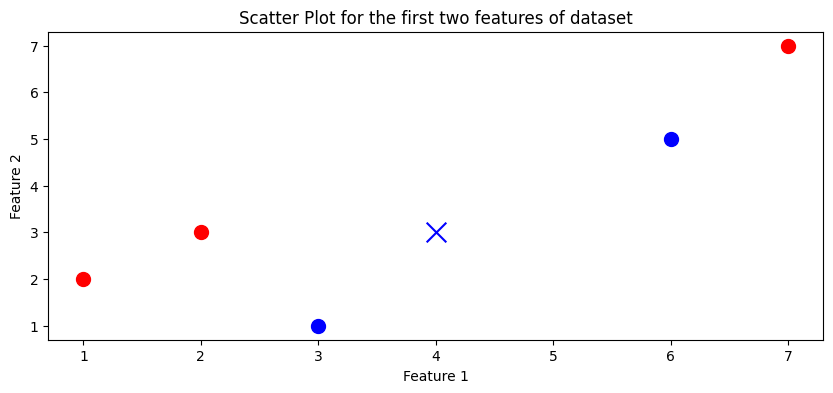

In [62]:
plt.figure( figsize = (10, 4) )

for i in range(X.shape[0]):
    plt.scatter(X[i][0], X[i][1], s=100, c=f"{y[i]}" )
plt.scatter(P[0], P[1], s=200, c=f"{p_class}", marker = 'x')

plt.title("Scatter Plot for the first two features of dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()